In [1]:
import math
import numpy as np
import pandas as pd
import scipy.optimize as optim
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('China_rawdata.csv')
df=df.dropna(axis=1, how='all')
df=df.dropna(axis = 0, how = 'all')
df=df[['date','Confirmed']]

In [3]:
df.head()

,date,Confirmed
0,09-01-2021,1117.0
1,09-02-2021,1117.0
2,09-03-2021,1117.0
3,09-04-2021,1118.0
4,09-05-2021,1118.0


In [4]:
df["date"]=np.arange(len(df))

In [5]:
df.head()

,date,Confirmed
0,0,1117.0
1,1,1117.0
2,2,1117.0
3,3,1118.0
4,4,1118.0


In [6]:
def logistic(t,a,b,c): #Q(t) the number of cases at time t 
    #a constant, b incubation rate, c cap value(the maximum number of cases for Q(t))
    return c/(1+a*np.exp(-b*t))#Q(t)
# #cased at begining c/(1+a)
# key point:t_fast= ln(a/b) : when the cumulative situation curve turns (rapid increase-> slow increase)
#Q(t_fast)=c/2
#a,b,c initialized randomly & update with nonlinear least square 
# upper bound of b: according to pandemic situation for each country
#d model the growth of COVID-19 with Logistic formula
#and learn the parameters a, b and c

In [7]:
#randomly initialize a,b,c
p0=np.random.exponential(size=3)
p0

array([0.81404064, 0.88148177, 0.15235986])

In [13]:
#set lower & upper bounds for a,b,c
bounds=(0,[10000,1.,10000])

In [14]:
#Nonlinear Least Squares optimization 
#gives us the values for a, b and c that minimize the Least Square Error of our model.
x = np.array(df['date'])#start from 1
y = np.array(df['Confirmed'])##
(a,b,c),cov = optim.curve_fit(logistic, x, y, bounds=bounds, p0=p0)

In [15]:
a,b,c

(8.670066873324366, 0.0020673143511849013, 9999.999999065127)

In [16]:
def logistic_f(t):
    
    #return c/(1+a*np.exp(-b*t))

Text(0, 0.5, 'Infections')

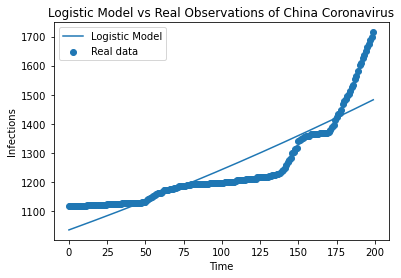

In [17]:
plt.scatter(x, y)
plt.plot(x,logistic_f(x))
plt.title('Logistic Model vs Real Observations of China Coronavirus')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Time')
plt.ylabel('Infections')

In [18]:
# The time step at which the growth is fastest
t_fastest = np.log(a) / b
t_fastest

1044.7741064202216

In [19]:
# First way to find the y of the fastest growth moment
y_fastest = c / 2
y_fastest

4999.999999532563

In [20]:
# Second way to find the y of the fastest growth moment
my_logistic(t_fastest)

NameError: name 'my_logistic' is not defined

In [ ]:
#https://towardsdatascience.com/modeling-logistic-growth-1367dc971de2
#https://jooskorstanje.com/modeling-logistic-growth-corona.html